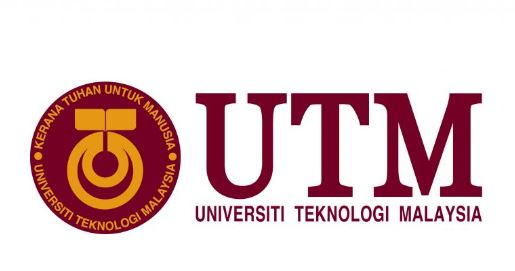










*Thesis Project of Msc Data Science by Lye*

**ANALYTICS DASHBOARD FOR LAPTOPS INFORMATION IN AMAZON USING MACHINE LEARNING APPROACH**

Technique Used

1.   Elbow Method, K-Means Clustering
2.   Normalization & Tokenization
3.   Vectorization
4.   Visualization (Pie,Bar,Word Cloud)










# Summarize & Introduction



*Nowadays, E-commerce is has become an indispensable part of the global retail framework. Like many other industries, the retail landscape has undergone a substantial transformation following the advent of the internet and thanks to the ongoing digitalization of modern life, consumers from virtually every country now profit from the perks of online transactions. E-commerce that is selected to be discussed in this research will be Amazon. Aim of this project is to develop a dashboard that aims to explore the Amazon dataset regarding the variety of laptop's brand and also the range of prices for those laptops in real cases. For handling the dataset, Microsoft Excel and Alteryx Designer will be using in the way for the data-pre-processing to transform the messy Amazon Laptop’s dataset into clean dataset. While in the further analysis, this project was choosing performing descriptive analysis from the dataset. This process will be using the Python software in Google Colab to run through the descriptive analysis which were Hierarchical Clustering and K-Means Clustering. In term of the Hierarchical Clustering will be using method of Dendrogram while K-Means Clustering were using method of Elbow Method and Silhouette Coefficient Method. After that will be doing a small conclusion about comparison of Discussion of K-Means and Hierarchical Clustering to do comparison. In final, K-Means which is more suitable and using the result of Silhouette Coefficient Method to do Word Cloud visualization to show cluster sales.*

# Data Preparation

1.   Packages Installation
2.   Data Cleaning



In [ ]:
# install packages
!pip install tweet-preprocessor
!pip install contractions
!pip install nltk
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 5.2 MB/s 
     |████████████████████████████████| 287 kB 44.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load library packages
import pandas as pd
import numpy as np

import re
import preprocessor as p
import contractions
import string

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import itertools
import collections

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df= pd.read_csv('/content/CleanData.csv')
df.head()

,Brand Name,Model,Processor,RAM+SSD,Graphics,Color,Price (RM),rating,rating_count
0,Dell,Inspiron-3502,Pentium-Silver-N5030,4GB+256GBSSD,IntegratedGraphics,AccentBlack,"RM2,272.76",4.2,230
1,HP,HP15,AMDRyzen3-3250,8GBRAM+1TBHDD+256GBSSD,Iris®X-Graphics,Sliver,"RM2,407.16",4.2,1725
2,Acer,Aspire3,AMD-Athlon-Silver-3050U,4GBRAM+1TSSD,AMD-Radeon-Graphics,Sliver,"RM1,840.82",3.5,7
3,Dell,Inspiron-3502,Pentium-Silver-N5030,4GB+256GBSSD,IntegratedGraphics,AccentBlack,"RM2,272.76",4.2,230
4,HP,Chromebook,Celeron-N4020,4GB+64GBeMMC+256GBExpandableStorage,Intel®UHD-Graphics,MineralSilver,"RM1,585.37",3.8,785


In [ ]:
# Explore the data content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand Name    798 non-null    object 
 1   Model         798 non-null    object 
 2   Processor     798 non-null    object 
 3   RAM+SSD       798 non-null    object 
 4   Graphics      798 non-null    object 
 5   Color         798 non-null    object 
 6   Price (RM)    798 non-null    object 
 7   rating        798 non-null    float64
 8   rating_count  798 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 56.2+ KB


In [ ]:
# Remove missing value by row deletion
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 797
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand Name    798 non-null    object 
 1   Model         798 non-null    object 
 2   Processor     798 non-null    object 
 3   RAM+SSD       798 non-null    object 
 4   Graphics      798 non-null    object 
 5   Color         798 non-null    object 
 6   Price (RM)    798 non-null    object 
 7   rating        798 non-null    float64
 8   rating_count  798 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 62.3+ KB


In [ ]:
df["Brand Name "].value_counts()

HP        268
Lenovo    146
ASUS       96
Acer       66
Dell       63
AVITA      58
Mi         36
RDP        32
MI         27
Avita       6
Name: Brand Name , dtype: int64

In [ ]:
# sample 798 data
df_sub = df.sample(n=798,random_state=12)
df_sub["Brand Name "].value_counts()

# not equally distributed. more comments towards positive ratings

HP        268
Lenovo    146
ASUS       96
Acer       66
Dell       63
AVITA      58
Mi         36
RDP        32
MI         27
Avita       6
Name: Brand Name , dtype: int64

In [ ]:
comment_document = df_sub["Brand Name "].values.astype("U")
comment_document

array(['HP', 'Lenovo', 'Lenovo', 'HP', 'HP', 'HP', 'ASUS', 'ASUS', 'Acer',
       'HP', 'AVITA', 'Acer', 'HP', 'AVITA', 'HP', 'Dell', 'AVITA',
       'Acer', 'Mi', 'HP', 'Avita', 'HP', 'Dell', 'RDP', 'Lenovo', 'Acer',
       'HP', 'Lenovo', 'HP', 'Acer', 'AVITA', 'HP', 'HP', 'Lenovo',
       'Lenovo', 'ASUS', 'HP', 'HP', 'Dell', 'HP', 'RDP', 'HP', 'HP',
       'ASUS', 'Mi', 'HP', 'ASUS', 'HP', 'Acer', 'Mi', 'Dell', 'HP',
       'Lenovo', 'HP', 'Lenovo', 'AVITA', 'MI', 'RDP', 'ASUS', 'ASUS',
       'HP', 'Lenovo', 'HP', 'Mi', 'HP', 'HP', 'AVITA', 'AVITA', 'HP',
       'Acer', 'ASUS', 'RDP', 'Acer', 'HP', 'Lenovo', 'AVITA', 'HP',
       'Lenovo', 'RDP', 'RDP', 'ASUS', 'MI', 'HP', 'AVITA', 'AVITA',
       'Lenovo', 'Dell', 'HP', 'ASUS', 'HP', 'Lenovo', 'ASUS', 'Acer',
       'Lenovo', 'RDP', 'HP', 'ASUS', 'HP', 'Lenovo', 'AVITA', 'Acer',
       'HP', 'ASUS', 'Acer', 'HP', 'HP', 'MI', 'HP', 'Acer', 'HP', 'HP',
       'Lenovo', 'HP', 'Mi', 'MI', 'Dell', 'HP', 'MI', 'HP', 'ASUS', 'HP',
     

# Normalization & Tokenization

Text Preprocessing (Normalization)

In [ ]:
#test
first5 = comment_document[:5]
first5

array(['HP', 'Lenovo', 'Lenovo', 'HP', 'HP'], dtype='<U6')

In [ ]:
import re
!pip install tweet-preprocessor
import preprocessor as p

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# text cleaning using preprocessor library (on Brand name)
df_sub["Brand_clean1"]= df_sub["Brand Name "].apply(p.clean)
df_sub.loc[:,"Brand_clean1"].sample(10)

323        HP
622        HP
469        MI
244        MI
724    Lenovo
633    Lenovo
304        HP
165     Avita
306        HP
636    Lenovo
Name: Brand_clean1, dtype: object

In [ ]:
#checking
dfz = df_sub[df_sub["Brand_clean1"].str.contains("")]
dfz.loc[:,"Brand_clean1"].sample(10)

327       RDP
792     AVITA
381        HP
42         HP
335    Lenovo
20      Avita
355        HP
497      Dell
639        HP
143        MI
Name: Brand_clean1, dtype: object

In [ ]:
# drop "em" from contraction dictionary
contractions.contractions_dict.pop('em', None)

'them'

In [ ]:
contractions.contractions_dict

{"'cause": 'because',
 "'tis": 'it is',
 "'twas": 'it was',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 'I’d': 'I would',
 'I’d’ve': 'I would have',
 'I’ll': 'I will',
 'I’ll’ve': 'I will have',
 'I’m': 'I am',
 'I’m’a': 'I am about to',
 'I’m’o': 'I am going to',
 'I’ve': 'I have',
 'Whatcha': 'What are you',
 "ain't": 'are not',
 'ain’t': 'are not',
 "amn't": 'am not',
 'amn’t': 'am not',
 'apr.': 'april',
 "aren't": 'are not',
 'aren’t': 'are not',
 'aug.': 'august',
 'can cause': 'can cause',
 "can't": 'cannot',
 "can't've": 'cannot have',
 'can’t': 'cannot',
 'can’t’ve': 'cannot have',
 'could cause': 'could cause',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 'couldn’t': 'could not',
 'couldn’t’ve': 'could not have',
 'could’ve': 'could have',
 "daren't": 'dare not',
 'daren’t': 'dare not',
 "daresn't"

In [ ]:
df_sub[["Brand_clean1"]].head()

,Brand_clean1
358,HP
235,Lenovo
63,Lenovo
231,HP
722,HP


*Tokenization*

In [ ]:
def tokenize_tweet(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
snowball_stemmer = SnowballStemmer('english')

In [ ]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [ ]:
def custom_tokenize(tweet,
                    keep_punct = True,
                    keep_alnum = True,
                    keep_stop = True):

  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation] # remove punctuation

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()] # remove alphabet

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not') # include negation
    token_list = [token for token in token_list if not token in stop_words] # remove stopwords

  return token_list

In [ ]:
def token_all(tweet):

  # Tokenization and Stemming
  token = custom_tokenize(tweet, keep_punct=True,keep_stop=True,keep_alnum=True)
  stemmer = SnowballStemmer("english")
  stem = stem_tokens(token, stemmer)

  return stem

In [ ]:
# drop original columns "Brand Name"
df_sub.drop(["Brand Name "],axis=1,inplace=True)
df_sub.head()

,Model,Processor,RAM+SSD,Graphics,Color,Price (RM),rating,rating_count,Brand_clean1
358,HP14,11thGen-IntelCore-i3,8GBRAM+256GBSSD,Iris®X-Graphics,Sliver,"RM2,372.67",4.2,731,HP
235,V15,AMD-AthlonSilver-3050U,4GBRAM+1TBHDD,Integrated-AMD-Radeon-Graphics,IronGrey,"RM1,801.17",3.3,161,Lenovo
63,IdeaPad-Slim3,AMD-AthlonSilver-3050U,4GBRAM+1TSSD,AMD-Radeon-Graphics,PlatinumGrey,"RM1,698.65",3.3,77,Lenovo
231,HP15,AMDRyzen3-3250,8GBRAM+1TBHDD+256GBSSD,Iris®X-Graphics,Sliver,"RM2,407.16",4.2,1725,HP
722,HP15,11thGen-IntelCore-i5-1135G7,8GBDRAM+1TBHDD,IntegratedGraphics,NaturalSilver,"RM3,256.26",3.9,506,HP


In [ ]:
# apply tokenize and stemming process to each row of Brand
df_sub["Brand_tokens"]= df_sub["Brand_clean1"].apply(token_all)
df_sub.head()

,Model,Processor,RAM+SSD,Graphics,Color,Price (RM),rating,rating_count,Brand_clean1,Brand_tokens
358,HP14,11thGen-IntelCore-i3,8GBRAM+256GBSSD,Iris®X-Graphics,Sliver,"RM2,372.67",4.2,731,HP,[hp]
235,V15,AMD-AthlonSilver-3050U,4GBRAM+1TBHDD,Integrated-AMD-Radeon-Graphics,IronGrey,"RM1,801.17",3.3,161,Lenovo,[lenovo]
63,IdeaPad-Slim3,AMD-AthlonSilver-3050U,4GBRAM+1TSSD,AMD-Radeon-Graphics,PlatinumGrey,"RM1,698.65",3.3,77,Lenovo,[lenovo]
231,HP15,AMDRyzen3-3250,8GBRAM+1TBHDD+256GBSSD,Iris®X-Graphics,Sliver,"RM2,407.16",4.2,1725,HP,[hp]
722,HP15,11thGen-IntelCore-i5-1135G7,8GBDRAM+1TBHDD,IntegratedGraphics,NaturalSilver,"RM3,256.26",3.9,506,HP,[hp]


# Vectorization

In [ ]:
# Step 3: Data preprocessing
# use Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

Vectorization for Brand Name

In [ ]:
# build TFiDF vectorizer with corpus
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [ ]:
# transform corpus into matrix
tf_vect1 = fit_tfidf(df_sub["Brand_tokens"])
tf_mtx1 = tf_vect1.transform(df_sub["Brand_tokens"])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
tf_vect1

TfidfVectorizer(preprocessor=<function fit_tfidf.<locals>.<lambda> at 0x7fa283851b00>,
                tokenizer=<function fit_tfidf.<locals>.<lambda> at 0x7fa2838519e0>)

In [ ]:
tf_mtx1

<798x8 sparse matrix of type '<class 'numpy.float64'>'
	with 798 stored elements in Compressed Sparse Row format>

In [ ]:
tf_mtx1.shape

(798, 8)

In [ ]:
# get feature names of Title (matrix columns)
feature1 = tf_vect1.get_feature_names()
print(len(feature1), " features", feature1)

8  features ['acer', 'asus', 'avita', 'dell', 'hp', 'lenovo', 'mi', 'rdp']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Clustering

Elbow Method (for Brand)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  


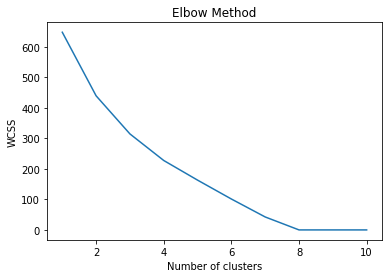

In [ ]:
from sklearn.cluster import KMeans
wcss = []
# iterate within 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(tf_mtx1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# up to 11 cluster
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(tf_mtx1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(tf_mtx1, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.44816199288391045
For n_clusters=3, The Silhouette Coefficient is 0.6046709462952409
For n_clusters=4, The Silhouette Coefficient is 0.7138752805358328
For n_clusters=5, The Silhouette Coefficient is 0.7945882806563914
For n_clusters=6, The Silhouette Coefficient is 0.871577678373148
For n_clusters=7, The Silhouette Coefficient is 0.9462486002239642
For n_clusters=8, The Silhouette Coefficient is 1.0
For n_clusters=9, The Silhouette Coefficient is 1.0
For n_clusters=10, The Silhouette Coefficient is 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
dist1 = 1 - cosine_similarity(tf_mtx1)
print(dist1)

[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [ ]:
df_sub.Brand_clean1.to_list()

['HP',
 'Lenovo',
 'Lenovo',
 'HP',
 'HP',
 'HP',
 'ASUS',
 'ASUS',
 'Acer',
 'HP',
 'AVITA',
 'Acer',
 'HP',
 'AVITA',
 'HP',
 'Dell',
 'AVITA',
 'Acer',
 'Mi',
 'HP',
 'Avita',
 'HP',
 'Dell',
 'RDP',
 'Lenovo',
 'Acer',
 'HP',
 'Lenovo',
 'HP',
 'Acer',
 'AVITA',
 'HP',
 'HP',
 'Lenovo',
 'Lenovo',
 'ASUS',
 'HP',
 'HP',
 'Dell',
 'HP',
 'RDP',
 'HP',
 'HP',
 'ASUS',
 'Mi',
 'HP',
 'ASUS',
 'HP',
 'Acer',
 'Mi',
 'Dell',
 'HP',
 'Lenovo',
 'HP',
 'Lenovo',
 'AVITA',
 'MI',
 'RDP',
 'ASUS',
 'ASUS',
 'HP',
 'Lenovo',
 'HP',
 'Mi',
 'HP',
 'HP',
 'AVITA',
 'AVITA',
 'HP',
 'Acer',
 'ASUS',
 'RDP',
 'Acer',
 'HP',
 'Lenovo',
 'AVITA',
 'HP',
 'Lenovo',
 'RDP',
 'RDP',
 'ASUS',
 'MI',
 'HP',
 'AVITA',
 'AVITA',
 'Lenovo',
 'Dell',
 'HP',
 'ASUS',
 'HP',
 'Lenovo',
 'ASUS',
 'Acer',
 'Lenovo',
 'RDP',
 'HP',
 'ASUS',
 'HP',
 'Lenovo',
 'AVITA',
 'Acer',
 'HP',
 'ASUS',
 'Acer',
 'HP',
 'HP',
 'MI',
 'HP',
 'Acer',
 'HP',
 'HP',
 'Lenovo',
 'HP',
 'Mi',
 'MI',
 'Dell',
 'HP',
 'MI',
 'HP'

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


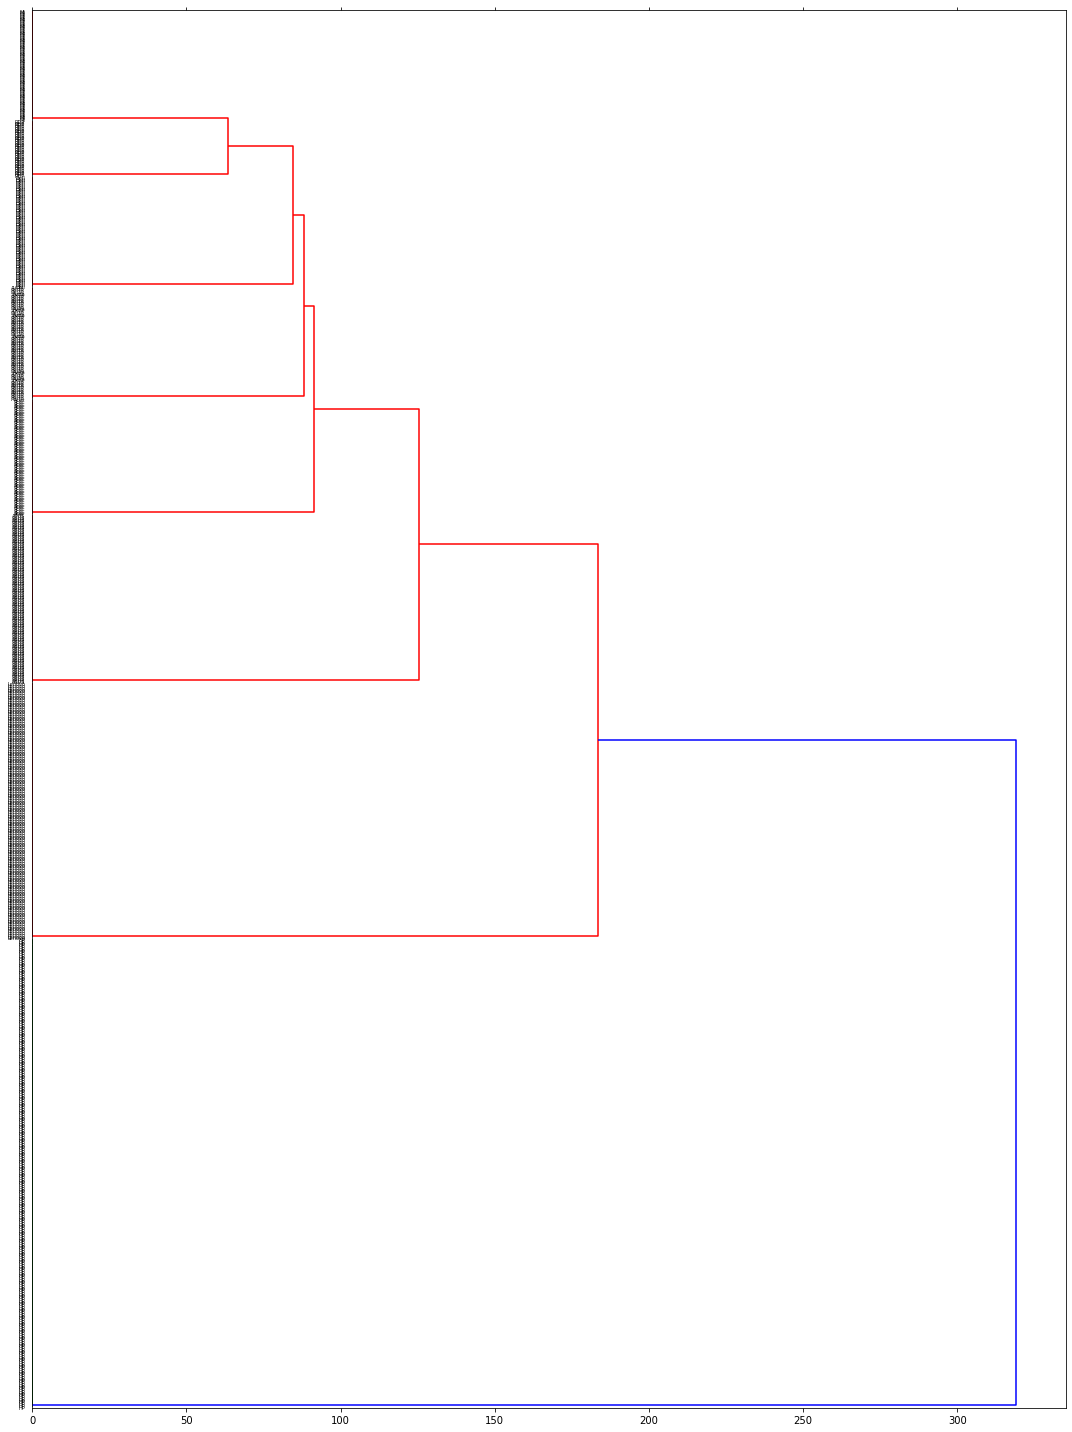

In [ ]:
# try code (for other attributes)
linkage_matrix1 = ward(dist1) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix1, orientation="right", labels=df_sub.Brand_clean1.to_list()); # label in list format

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

Cluster for Brand

In [ ]:
# elbow shape at cluster number 2 or 5. select k = 5 to start clustering
k1 = 5  #no. of the cluster
model1 = KMeans(n_clusters=k1, init='k-means++', max_iter=400, n_init=1,random_state=10)
model1.fit(tf_mtx1)

KMeans(max_iter=400, n_clusters=5, n_init=1, random_state=10)

In [ ]:
df_sub['cluster_Brand'] = model1.labels_

In [ ]:
df_sub.head()

,Model,Processor,RAM+SSD,Graphics,Color,Price (RM),rating,rating_count,Brand_clean1,Brand_tokens,cluster_Brand
358,HP14,11thGen-IntelCore-i3,8GBRAM+256GBSSD,Iris®X-Graphics,Sliver,"RM2,372.67",4.2,731,HP,[hp],2
235,V15,AMD-AthlonSilver-3050U,4GBRAM+1TBHDD,Integrated-AMD-Radeon-Graphics,IronGrey,"RM1,801.17",3.3,161,Lenovo,[lenovo],3
63,IdeaPad-Slim3,AMD-AthlonSilver-3050U,4GBRAM+1TSSD,AMD-Radeon-Graphics,PlatinumGrey,"RM1,698.65",3.3,77,Lenovo,[lenovo],3
231,HP15,AMDRyzen3-3250,8GBRAM+1TBHDD+256GBSSD,Iris®X-Graphics,Sliver,"RM2,407.16",4.2,1725,HP,[hp],2
722,HP15,11thGen-IntelCore-i5-1135G7,8GBDRAM+1TBHDD,IntegratedGraphics,NaturalSilver,"RM3,256.26",3.9,506,HP,[hp],2


In [ ]:
#clusters

df_sub.reset_index(drop=True,inplace=True) # reset index
df_sub.head()

,Model,Processor,RAM+SSD,Graphics,Color,Price (RM),rating,rating_count,Brand_clean1,Brand_tokens,cluster_Brand
0,HP14,11thGen-IntelCore-i3,8GBRAM+256GBSSD,Iris®X-Graphics,Sliver,"RM2,372.67",4.2,731,HP,[hp],2
1,V15,AMD-AthlonSilver-3050U,4GBRAM+1TBHDD,Integrated-AMD-Radeon-Graphics,IronGrey,"RM1,801.17",3.3,161,Lenovo,[lenovo],3
2,IdeaPad-Slim3,AMD-AthlonSilver-3050U,4GBRAM+1TSSD,AMD-Radeon-Graphics,PlatinumGrey,"RM1,698.65",3.3,77,Lenovo,[lenovo],3
3,HP15,AMDRyzen3-3250,8GBRAM+1TBHDD+256GBSSD,Iris®X-Graphics,Sliver,"RM2,407.16",4.2,1725,HP,[hp],2
4,HP15,11thGen-IntelCore-i5-1135G7,8GBDRAM+1TBHDD,IntegratedGraphics,NaturalSilver,"RM3,256.26",3.9,506,HP,[hp],2


In [ ]:
# Step 5: Evaluate the results
print("Cluster centroids: \n")
order_centroids1 = model1.cluster_centers_.argsort()[:, ::-1]
terms1 = tf_vect1.get_feature_names()

for i in range(k1):
    print("Cluster %d:" % i)
    for j in order_centroids1[i, :10]: #print out 10 important feature terms of each cluster
        print (' %s' % terms1[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 avita
 mi
 dell
 rdp
 lenovo
 hp
 asus
 acer
------------
Cluster 1:
 asus
 rdp
 mi
 lenovo
 hp
 dell
 avita
 acer
------------
Cluster 2:
 hp
 rdp
 mi
 lenovo
 dell
 avita
 asus
 acer
------------
Cluster 3:
 lenovo
 rdp
 mi
 hp
 dell
 avita
 asus
 acer
------------
Cluster 4:
 acer
 rdp
 mi
 lenovo
 hp
 dell
 avita
 asus
------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Visualization

Visualization

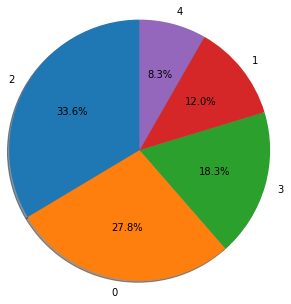

In [ ]:
# data visualization with pie chart (Brand)
cluster_count1 = df_sub["cluster_Brand"].value_counts()
plt.pie(cluster_count1, labels=cluster_count1.index, autopct="%1.1f%%",shadow=True,startangle=90, radius=1.5)
#plt.legend(title="Cluster Distribution for Brand")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Brand by Clusters')

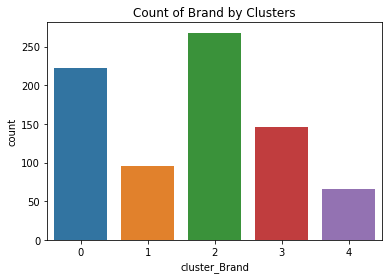

In [ ]:
import seaborn as sns
sns.countplot(df_sub['cluster_Brand'],label = 'count')
plt.title("Count of Brand by Clusters")

In [ ]:
!pip install WordCloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# document clustering
# subset data of clusters belong to "Brand" (0-4)
clust_Brand0 = df_sub[df_sub['cluster_Brand']== 0]
clust_Brand1 = df_sub[df_sub['cluster_Brand']== 1]
clust_Brand2 = df_sub[df_sub['cluster_Brand']== 2]
clust_Brand3 = df_sub[df_sub['cluster_Brand']== 3]
clust_Brand4 = df_sub[df_sub['cluster_Brand']== 4]

In [ ]:
# check
clust_Brand0.head()

,Model,Processor,RAM+SSD,Graphics,Color,Price (RM),rating,rating_count,Brand_clean1,Brand_tokens,cluster_Brand
10,Essential,IntelCeleron-N4000,4GB+128GBSSD,IntegratedGraphics,ConcreteGrey,"RM1,331.05",3.9,1157,AVITA,[avita],0
13,Essential,IntelCeleron-N4000,4GB+128GBSSD,IntegratedGraphics,ConcreteGrey,"RM1,331.05",3.9,1157,AVITA,[avita],0
15,Inspiron-3502,Pentium-Silver-N5030,4GB+256GBSSD,IntegratedGraphics,AccentBlack,"RM2,272.76",4.2,230,Dell,[dell],0
16,Essential,IntelCeleron-N4000,4GB+128GBSSD,IntegratedGraphics,ConcreteGrey,"RM1,331.05",3.9,1157,AVITA,[avita],0
18,NotebookHorizon-14,"IntelCore-i7-10510U,10thGen",8GB+512GBSSD,"Nvidia-MX350,2GBGraphics",Grey,"RM3,397.86",4.2,845,Mi,[mi],0


*WordCloud* (Brand)

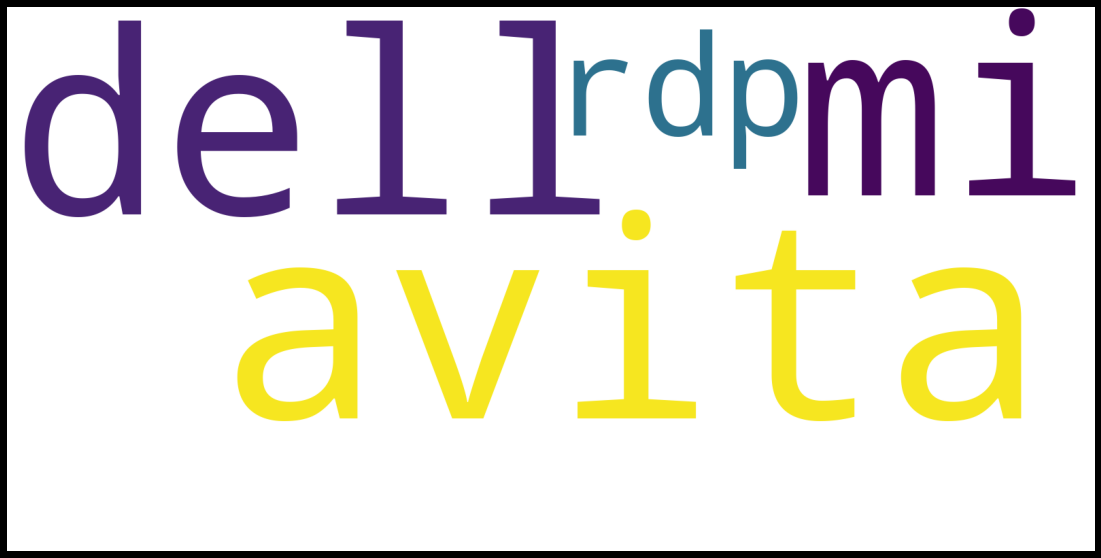

In [ ]:
clust0_Brandlist = [item for sublist in clust_Brand0["Brand_tokens"] for item in sublist]
clust0_Brand_bow = ' '.join(clust0_Brandlist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust0_Brand_bow))
plt.axis("off")
plt.show()

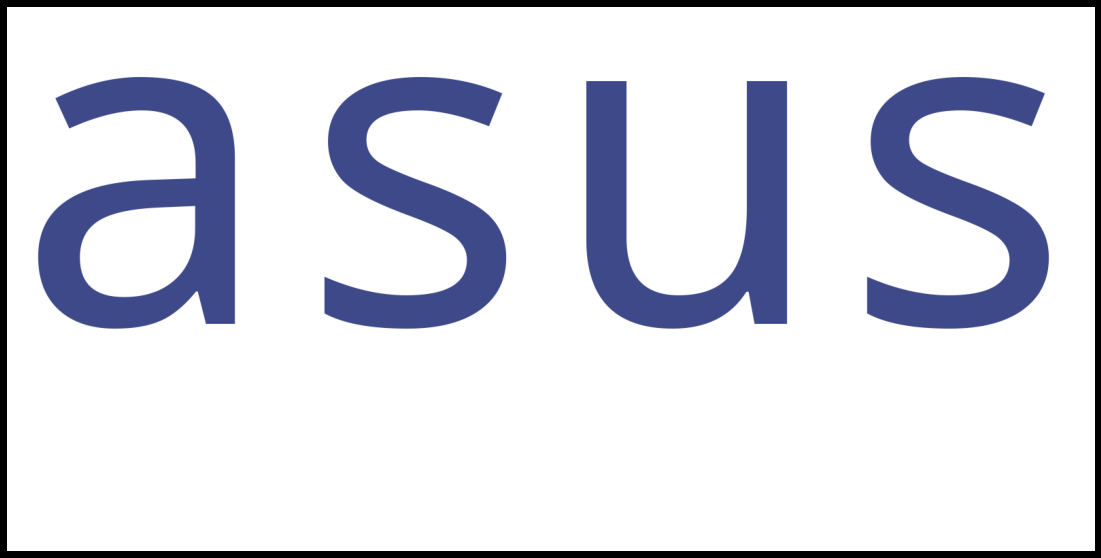

In [ ]:
clust1_Brandlist = [item for sublist in clust_Brand1["Brand_tokens"] for item in sublist]
clust1_Brand_bow = ' '.join(clust1_Brandlist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust1_Brand_bow))
plt.axis("off")
plt.show()

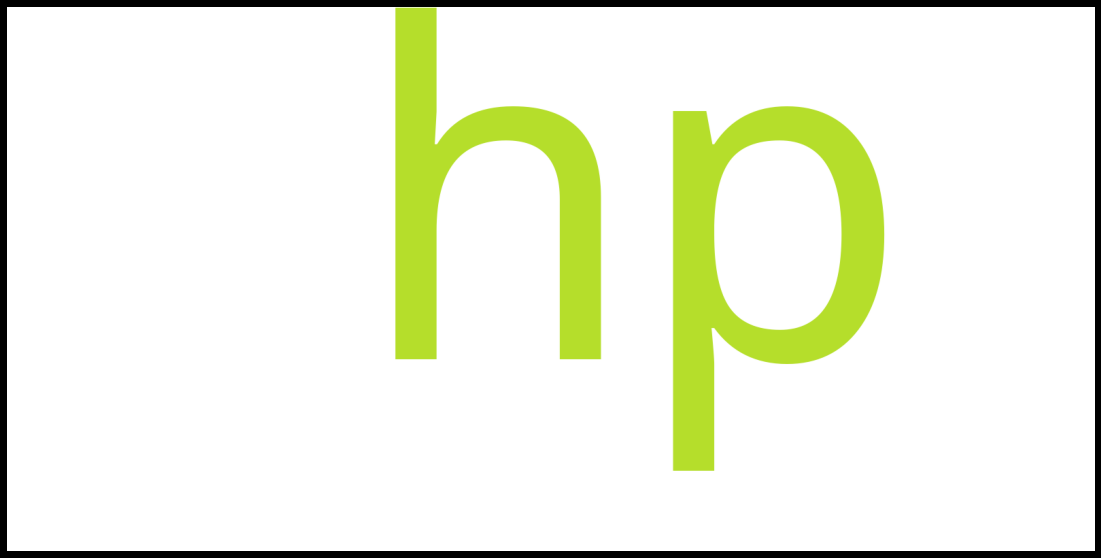

In [ ]:
clust2_Brandlist = [item for sublist in clust_Brand2["Brand_tokens"] for item in sublist]
clust2_Brand_bow = ' '.join(clust2_Brandlist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust2_Brand_bow))
plt.axis("off")
plt.show()

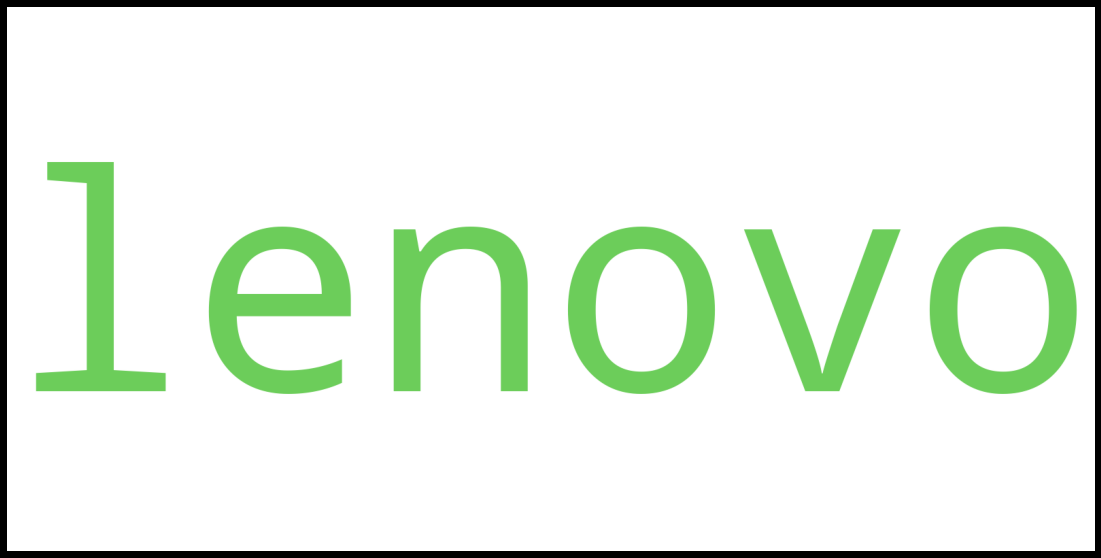

In [ ]:
clust3_Brandlist = [item for sublist in clust_Brand3["Brand_tokens"] for item in sublist]
clust3_Brand_bow = ' '.join(clust3_Brandlist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust3_Brand_bow))
plt.axis("off")
plt.show()

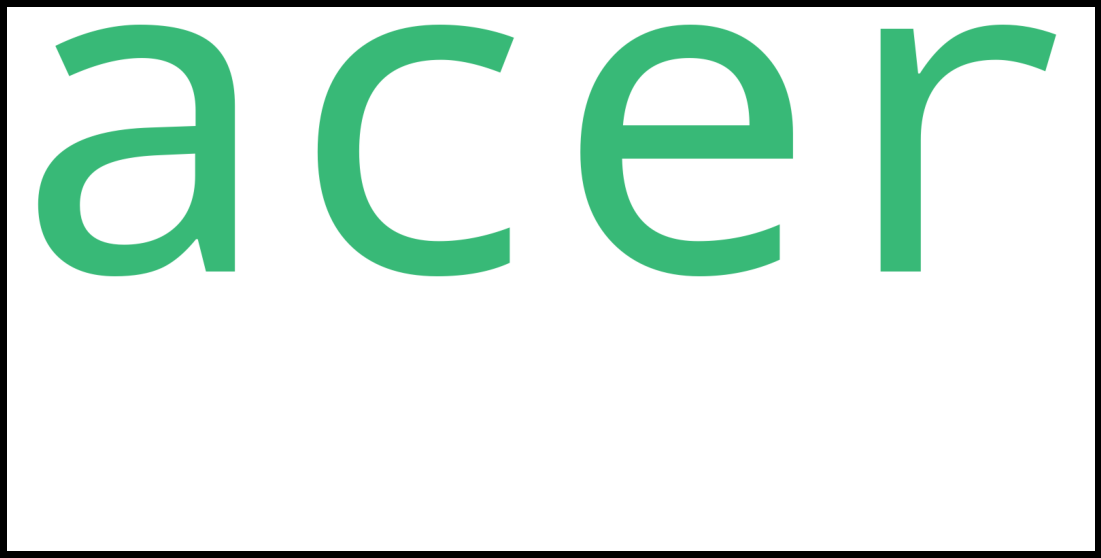

In [ ]:
clust4_Brandlist = [item for sublist in clust_Brand4["Brand_tokens"] for item in sublist]
clust4_Brand_bow = ' '.join(clust4_Brandlist)
plt.figure(figsize=(20,10),facecolor="k")
plt.imshow(WordCloud(background_color="white",colormap="viridis",width=1600, height=800).generate(clust4_Brand_bow))
plt.axis("off")
plt.show()

Frequency Count on "Brand" (bar chart)

In [ ]:
import itertools
import collections

In [ ]:
# list of all words across cluster0 tokens
all_Brand0_tokens = list(itertools.chain(*clust_Brand0["Brand_tokens"].tolist()))

# Create counter (Brand0 tokens only)
counts_Brand0 = collections.Counter(all_Brand0_tokens)
counts_Brand0.most_common(10)

[('avita', 64), ('dell', 63), ('mi', 63), ('rdp', 32)]

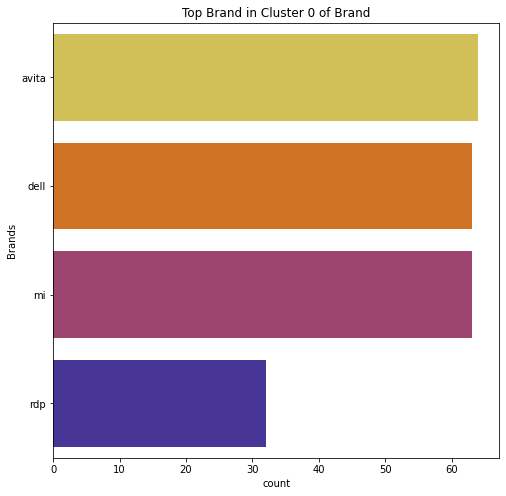

In [ ]:
clust0_Brand_freq_df = pd.DataFrame(counts_Brand0.most_common(10), columns = ["Brands","count"])
#clust0_Brand_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="Brands",
            data=clust0_Brand_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top Brand in Cluster 0 of Brand")
ax.grid(False)

In [ ]:
# list of all words across cluster1 tokens
all_Brand1_tokens = list(itertools.chain(*clust_Brand1["Brand_tokens"].tolist()))

# Create counter (Brand1 tokens only)
counts_Brand1 = collections.Counter(all_Brand1_tokens)
counts_Brand1.most_common(10)

[('asus', 96)]

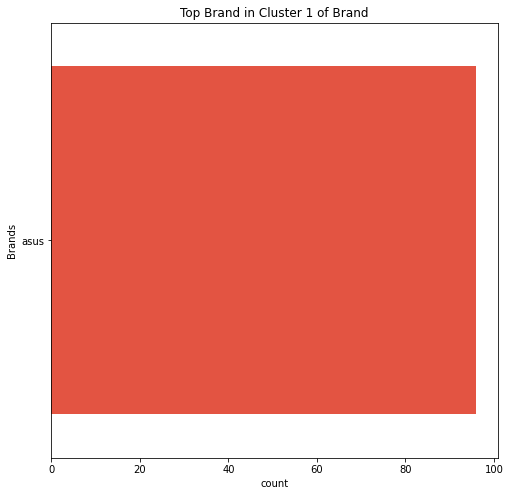

In [ ]:
clust1_Brand_freq_df = pd.DataFrame(counts_Brand1.most_common(10), columns = ["Brands","count"])
#clust1_Brand_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="Brands",
            data=clust1_Brand_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top Brand in Cluster 1 of Brand")
ax.grid(False)

In [ ]:
# list of all words across cluster2 tokens
all_Brand2_tokens = list(itertools.chain(*clust_Brand2["Brand_tokens"].tolist()))

# Create counter (Brand2 tokens only)
counts_Brand2 = collections.Counter(all_Brand2_tokens)
counts_Brand2.most_common(10)

[('hp', 268)]

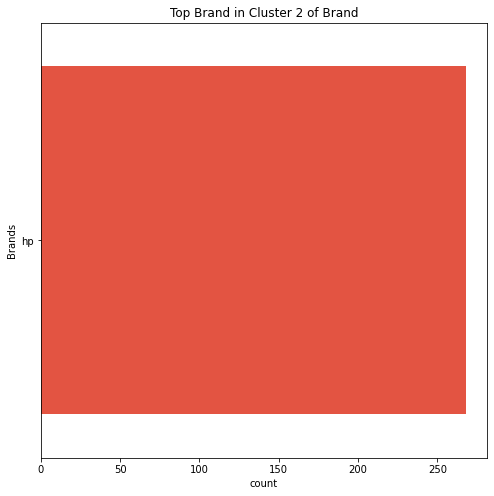

In [ ]:
clust2_Brand_freq_df = pd.DataFrame(counts_Brand2.most_common(10), columns = ["Brands","count"])
#clust2_Brand_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="Brands",
            data=clust2_Brand_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top Brand in Cluster 2 of Brand")
ax.grid(False)

In [ ]:
# list of all words across cluster3 tokens
all_Brand3_tokens = list(itertools.chain(*clust_Brand3["Brand_tokens"].tolist()))

# Create counter (Brand3 tokens only)
counts_Brand3 = collections.Counter(all_Brand3_tokens)
counts_Brand3.most_common(10)

[('lenovo', 146)]

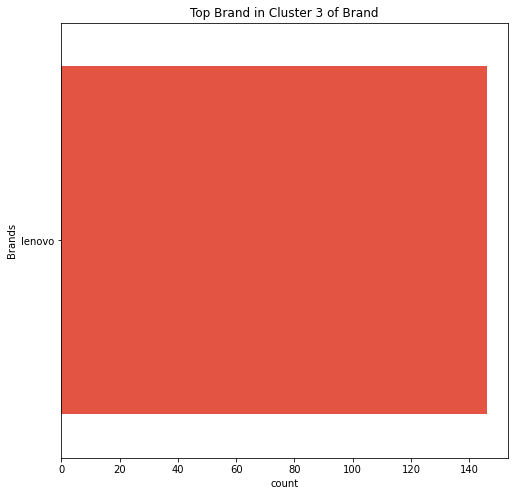

In [ ]:
clust3_Brand_freq_df = pd.DataFrame(counts_Brand3.most_common(10), columns = ["Brands","count"])
#clust3_Brand_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="Brands",
            data=clust3_Brand_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top Brand in Cluster 3 of Brand")
ax.grid(False)

In [ ]:
# list of all words across cluster4 tokens
all_Brand4_tokens = list(itertools.chain(*clust_Brand4["Brand_tokens"].tolist()))

# Create counter (Brand4 tokens only)
counts_Brand4 = collections.Counter(all_Brand4_tokens)
counts_Brand4.most_common(10)

[('acer', 66)]

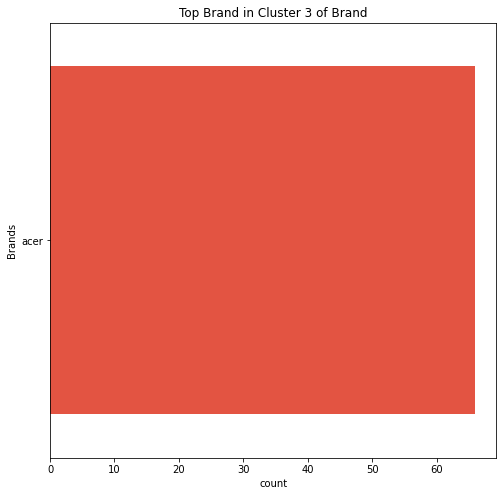

In [ ]:
clust4_Brand_freq_df = pd.DataFrame(counts_Brand4.most_common(10), columns = ["Brands","count"])
#clust4_Brand_freq_df.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot the word frequency count (horizontal bar chart)
sns.barplot(x="count", y="Brands",
            data=clust4_Brand_freq_df,
            orient = "h", palette=("CMRmap_r"))
plt.title("Top Brand in Cluster 3 of Brand")
ax.grid(False)